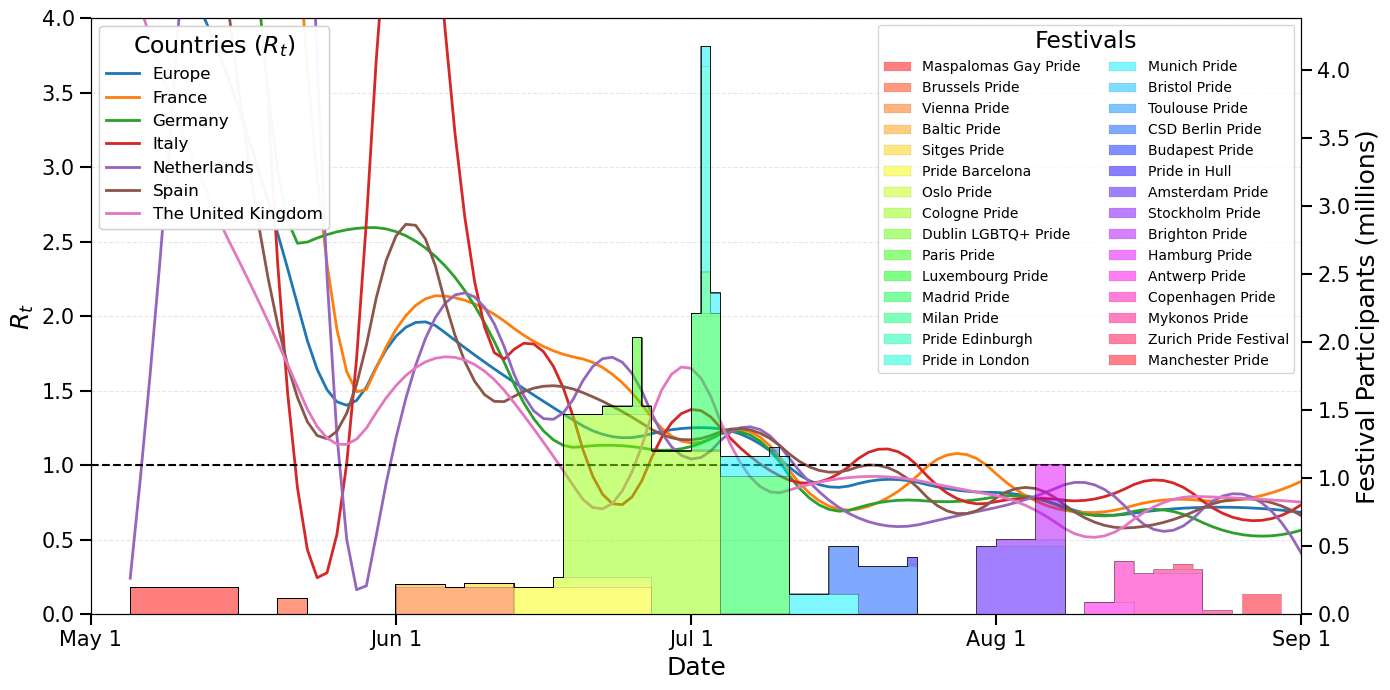

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

rt_df = pd.read_csv('RT_by_country.csv', parse_dates=['reference_date'])

# The file rt_by_country.csv can be generated from Fig_1B.ipynb

# Sample DataFrame
data = {
    "Name": [
        "Maspalomas Gay Pride", "Sitges Pride", "CSD Berlin Pride", "Oslo Pride", 
        "Paris Pride", "Dublin LGBTQ+ Pride", "Copenhagen Pride", "Pride in London", "Madrid Pride", 
        "Cologne Pride", "Milan Pride", "Bristol Pride", "Pride in Hull", "Pride Edinburgh", 
        "Budapest Pride", "Pride Barcelona", "Luxembourg Pride", "Toulouse Pride", "Hamburg Pride", 
        "Munich Pride", "Amsterdam Pride", "Brighton Pride", "Zurich Pride Festival", "Stockholm Pride", 
        "Antwerp Pride", "Manchester Pride","Vienna Pride","Mykonos Pride","Brussels Pride","Baltic Pride"
    ],
    "City": [
        "Gran Canaria", "Sitges", "Berlin", "Oslo", 
        "Paris", "Dublin", "Copenhagen", "London", "Madrid", 
        "Cologne", "Milan", "Bristol", "Hull", "Edinburgh", 
        "Budapest", "Barcelona", "Luxembourg", "Toulouse", "Hamburg", 
        "Munich", "Amsterdam", "Brighton", "Zurich", "Stockholm", 
        "Antwerp", "Manchester", "Vienna","Mykonos","Brussels", "Vilnius"
    ],
    "Participants": [ 
        200000, 30000, 350000, 70000, 
        500000, 60000, 300000, 1500000, 1000000, 
        1200000, 300000, 40000, 50000, 10000, 
        20000, 200000, 10000, 25000, 250000, 
        150000, 500000, 300000, 40000, 50000, 
        90000, 150000, 200000,30000, 120000,20000
    ], # These numbers are scraped manually from the internet
    "Checked": [
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes','Yes','Yes','Yes','Yes','Yes'
    ],
    "Start Date": [
        "2022-05-05", "2022-06-08", "2022-07-15", "2022-06-17", 
        "2022-06-25", "2022-06-22", "2022-08-13", "2022-07-02", "2022-07-01", 
        "2022-06-18", "2022-07-02", "2022-07-09", "2022-07-23", "2022-07-02", 
        "2022-07-23", "2022-06-13", "2022-07-01", "2022-07-09", "2022-08-05", 
        "2022-07-02", "2022-07-30", "2022-08-05", "2022-08-19", "2022-08-01", 
        "2022-08-10", "2022-08-26", "2022-06-01", "2022-08-17", "2022-05-20",
        "2022-06-01"
    ],
    "End Date": [
        "2022-05-15", "2022-06-12", "2022-07-23", "2022-06-26", 
        "2022-06-25", "2022-06-26", "2022-08-21", "2022-07-02", "2022-07-10", 
        "2022-07-03", "2022-07-02", "2022-07-09", "2022-07-23", "2022-07-02", 
        "2022-07-23", "2022-06-26", "2022-07-10", "2022-07-09", "2022-08-07", 
        "2022-07-17", "2022-08-07", "2022-08-07", "2022-08-20", "2022-08-07", 
        "2022-08-14", "2022-08-29", "2022-06-12", "2022-08-24", "2022-05-22",
        "2022-06-05"
    ],
    "Reference" : [""]*30
}

df = pd.DataFrame(data)

df.loc[df["City"] == "Madrid", "Reference"]         = "https://www.abc.net.au/news/2022-07-10/mardrid-pride-returns-after-two-years-of-pandemic-disruption/101224804"
df.loc[df["City"] == "London", "Reference"]         = "https://www.mylondon.news/news/zone-1-news/over-15-million-people-went-24385343"
df.loc[df["City"] == "Cologne", "Reference"]        = "https://spectrumnews1.com/ap-online/2022/07/03/colognes-pride-parade-draws-upwards-of-1-million-in-germany"
df.loc[df["City"] == "Paris", "Reference"]          = "https://www.cnews.fr/france/2022-06-25/marche-des-fiertes-pres-de-500000-personnes-attendues-aujourdhui-paris-1234487?utm_source=chatgpt.com"
df.loc[df["City"] == "Berlin", "Reference"]         = "https://en.wikipedia.org/wiki/Berlin_Pride?utm_source=chatgpt.com"
df.loc[df["City"] == "Gran Canaria", "Reference"]   = "https://www.canarianweekly.com/posts/Nearly-300-000-people-attended-Pride-in-Maspalomas?utm_source=chatgpt.com"

# Convert Start/End to datetime and sort (as you already do)
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date']   = pd.to_datetime(df['End Date'])
df = df.sort_values('Start Date').reset_index(drop=True)

# Create full date range
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')

# Initialize a wide-format DataFrame: index is each date, columns each festival
wide = pd.DataFrame(0, index=date_range, columns=df['Name'])



# Fill in the participants for each festival on its active dates
for _, row in df.iterrows():
    # create mask for that festival's date span
    mask = (wide.index >= row['Start Date']) & (wide.index <= row['End Date'])
    wide.loc[mask, row['Name']] = row['Participants']

# ---- SCALE TO MILLIONS ----
wide_m = wide / 1e6

# (you can still use the same colors you computed for `wide`)
n = wide_m.shape[1]
cmap = plt.get_cmap('hsv', n)
colors = [cmap(i) for i in range(n)]

ticksize = 15
legendsizert = 12
legendsizepart = 10
legendtitlesize = 17
labelsize = 18


# ---- PLOT TOGETHER ----
fig, ax1 = plt.subplots(figsize=(14, 7))

# 1) plot Rt on primary y-axis
for country, grp in rt_df.groupby('country'):                                      
    ax1.plot(grp['reference_date'], grp['Rt'], label=country, linewidth=2)        

ax1.set_xlabel('Date',fontsize = labelsize)
ax1.set_ylabel(r'$R_t$',fontsize = labelsize)
ax1.set_ylim(0,4)
ax1.axhline(1,color = "k", ls = "--")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.grid(True, which='both', axis='y', linestyle='--', alpha=0.3)

# secondary axis for festival participants
ax2 = ax1.twinx()                                                                   
n = wide_m.shape[1]                                                                 
cmap = plt.get_cmap('hsv', n)                                                       
colors = [cmap(i) for i in range(n)]                                                

ax2.stackplot(
    wide_m.index,
    *wide_m.T.values,
    labels=wide_m.columns,
    colors=colors,
    alpha=0.5,
    step='post',
    edgecolor = "black",
    linewidth = 0.1
)



ax2.set_ylabel('Festival Participants (millions)',fontsize = labelsize)                                  
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Rt legend on ax1
handles_rt, labels_rt = ax1.get_legend_handles_labels()                             
legend_rt = ax1.legend(handles_rt, labels_rt,
                        loc='upper left',
                        title=r'Countries ($R_t$)',
                        fontsize=legendsizert,
                        title_fontsize = legendtitlesize)                                             
ax1.add_artist(legend_rt)                                                       

# Festival legend on ax2
handles_fest, labels_fest = ax2.get_legend_handles_labels()                         
ax2.legend(handles_fest, labels_fest,
           loc='upper right',
           title='Festivals',
           ncol=2,
           fontsize=legendsizepart,
           title_fontsize = legendtitlesize)  

# Align x-limits (e.g. focus May–September)
ax1.set_xlim(pd.to_datetime('2022-05-01'), pd.to_datetime('2022-09-01'))

# for ax1 (Rₜ plot)
ax1.tick_params(
    axis='both',       # both x and y
    which='major',     # major ticks
    labelsize=ticksize,# tick‐label font size
    length=8,          # tick‐mark length in points
    width=1.5          # tick‐mark line width in points
)

# for ax2 (stackplot)
ax2.tick_params(
    axis='y',          # only y‐axis ticks (x shared with ax1)
    which='major',
    labelsize=ticksize,
    length=8,
    width=1.5
)

fig.tight_layout()
plt.show()



In [2]:
top5 = df.nlargest(5, 'Participants')[['Name', 'Participants', 'Start Date', 'End Date']]
print(top5)

               Name  Participants Start Date   End Date
14  Pride in London       1500000 2022-07-02 2022-07-02
7     Cologne Pride       1200000 2022-06-18 2022-07-03
11     Madrid Pride       1000000 2022-07-01 2022-07-10
9       Paris Pride        500000 2022-06-25 2022-06-25
21  Amsterdam Pride        500000 2022-07-30 2022-08-07
